# Project 1st Milestone
1. Data Cleaning: Han Hoang
2. Explanatory Data Analysis: Han Hoang, Johnny Diep
3. Feature Selection: Carson Dial

## Explanatory Data Analysis

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


### 1. Getting insights about the dataset

In [ ]:
# Import dataset
df = pd.read_csv("Covid Data.csv")

# Drop rows with missing values (NaN)
df = df.dropna() 

# Make all column headers lowercase
df.columns = map(str.lower, df.columns)

In [ ]:
df.head()

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,...,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
df.shape

(1048575, 21)

**The raw dataset consists of 21 features and 1,048,575 unique patients.**

### 2. Data Cleaning

In [ ]:
# Number of unique values by columns
for i in df.columns:
    print(i,":",len(df[i].unique()))

usmer : 2
medical_unit : 13
sex : 2
patient_type : 2
date_died : 401
intubed : 4
pneumonia : 3
age : 121
pregnant : 4
diabetes : 3
copd : 3
asthma : 3
inmsupr : 3
hipertension : 3
other_disease : 3
cardiovascular : 3
obesity : 3
renal_chronic : 3
tobacco : 3
clasiffication_final : 7
icu : 4


Out of 21 features, there are features we expect to be binary which are *intubed, pneumonia, pregnant, diabetes, copd, asthma, inmsupr, hipertension, other_disease, cardiovascular, obesity, renal_chronic, tobacco, icu*. However, they all have 3-4 values including "yes" labled as 1, "no" labeld as 2 and values as 97, 98 and 99 are missing data, which we don't want in the dataset.

First, let's visualize unique values of 3 features: `intubed`, `icu`, `pregnant`

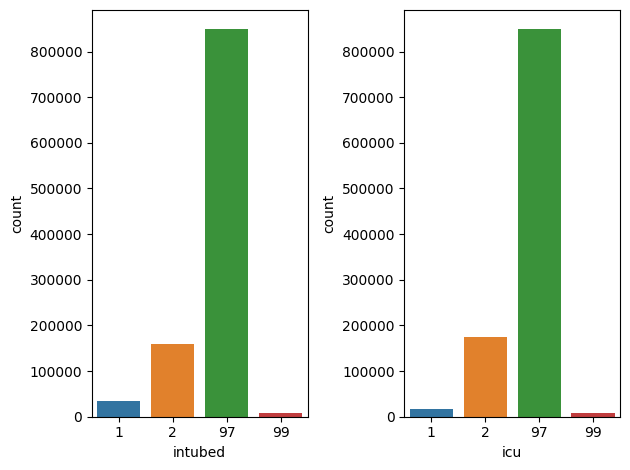

In [ ]:
# intubed
plt.subplot(1, 2, 1)
sns.countplot(x = 'intubed', data = df, palette="pastel")

# icu
plt.subplot(1, 2, 2)
sns.countplot(x = 'icu', data = df, palette="pastel")

plt.tight_layout()
plt.show()

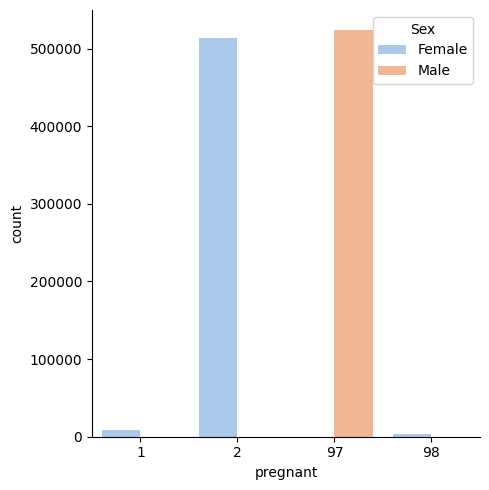

In [ ]:
p = sns.catplot(x="pregnant", 
                hue="sex", 
                kind="count",
                palette="pastel",
                data=df,
                legend=False
)

plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show(p)

### Inference:
- In columns `intubed` and `icu`, there are more than half data are missing. We will lose most data to analyze if we remove all the missing data in these 2 columns. Hence, we decided to drop `intubed` and `icu` columns from the dataset.
- In column `pregnant`, all values 97 are relatives to male patients. Therefore, we want to replace 97 with 2 which means 'not pregnant'. In addition, we will remove rows containing value 98 since these are the real missing data for female patients.

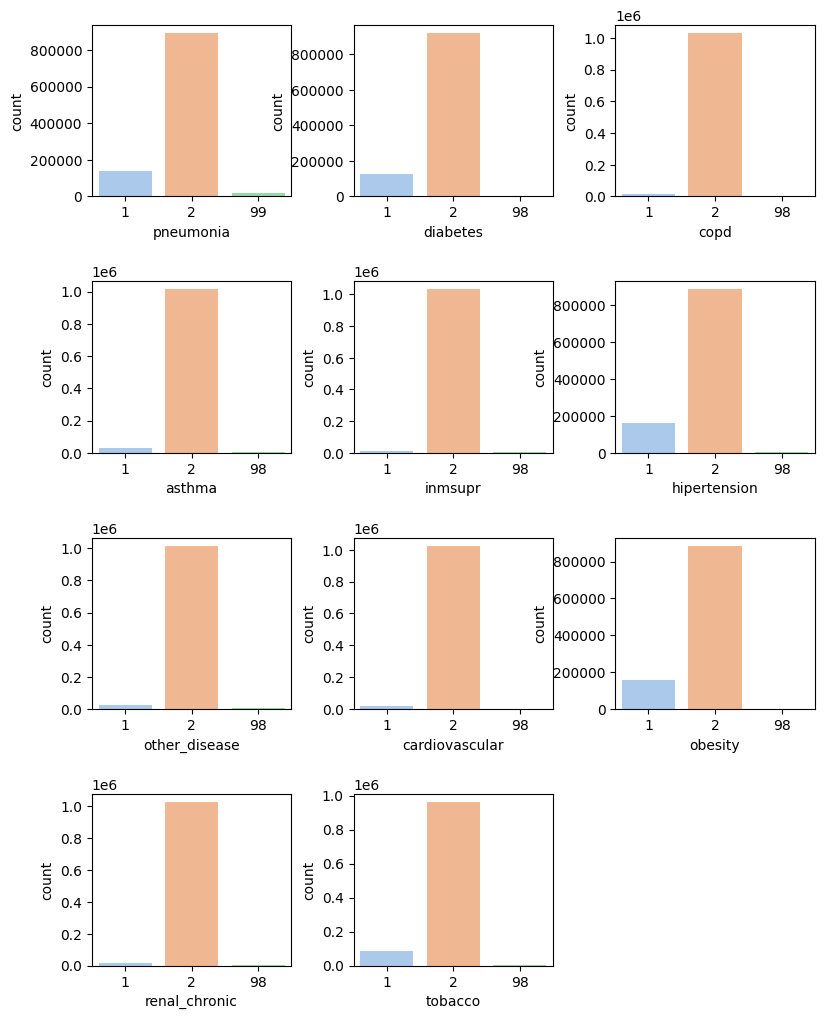

In [ ]:
# Visualize the remaining binary variables
features = ['pneumonia', 'diabetes', 'copd', 'asthma', 'inmsupr',
           'hipertension', 'other_disease', 'cardiovascular', 'obesity',
           'renal_chronic', 'tobacco'] # 11 features

# define the figure and subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8, 10))
fig.tight_layout(h_pad=4)

# convert array to 1D
axes = axes.ravel() 

for f, ax in zip(features, axes):
    sns.countplot(x=f, data = df, ax = ax, palette = "pastel")
    
fig.delaxes(axes[11])  # delete the empty subplot
plt.show()

In the remaining binary columns, missing data accounts for very small percent so we will simply remove any rows with missing data (labeled as 98, 99).

### Cleaning tasks:
- Catagorize column `date_died` with new column `death` such that *death = 2 (false)* if `date_died`= 9999-99-99, otherwise *death = 1 (true)*
- Remove 2 columns `intubed` and `icu` (missing data >> valid data)
- In column `pregnant`, remove missing data (labeled as 98) and convert value 97 to 2.
- Remove rows with missing data (labeled as 98, 99) in following columns: `pneumonia`, `diabetes`, `copd`, `asthma`, `inmsupr`, `hipertension`, `other_disease`, `cardiovascular`, `obesity`, `renal_chronic`, `tobacco`

In [ ]:
# Add 'death' column based on 'data_died' column 
# "9999-99-99" => death = 2, otherwise => death = 1
df['death'] = np.where(df['date_died'] == "9999-99-99", '2', '1')

# Convert value 97 to 2 in 'pregnant' column
df['pregnant'] = df['pregnant'].replace(97,2)

In [ ]:
# Drop 'intubed', 'icu', 'data_died' columns
df.drop(['intubed', 'icu', 'date_died'], axis=1, inplace=True)

In [ ]:
# List of columns that need cleaning data
cols = ['pneumonia', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hipertension', 
     'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'pregnant']

# Remove rows with missing data (97, 98, 99)
for col in cols:
      df = df.drop(df[(df[col] != 1) & (df[col] != 2)].index)

In [ ]:
df.shape

(1021977, 19)

**After cleaning the data, our dataset now has 19 features and 1,021,977 unique patients.**

In [ ]:
# Save the cleaned data
df.to_csv("cleaned_data.csv", index=False)

### 3. Data Visualization

In [4]:
# Import cleaned data
df1 = pd.read_csv("cleaned_data.csv")

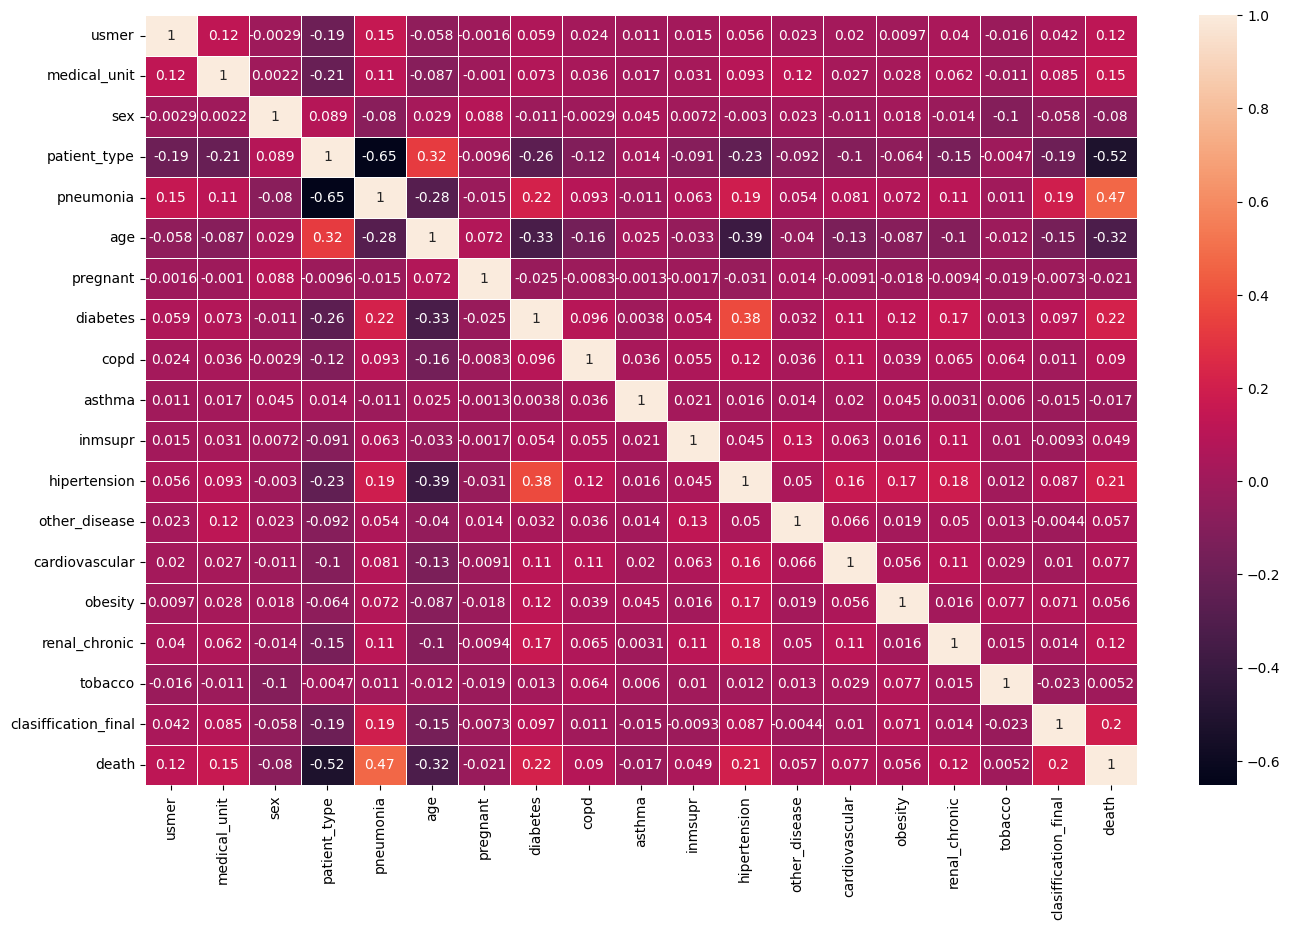

In [5]:
# Correlation matrix
correlation_matrix = df1.corr()
plt.figure(figsize = (16,10))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5)
plt.show()

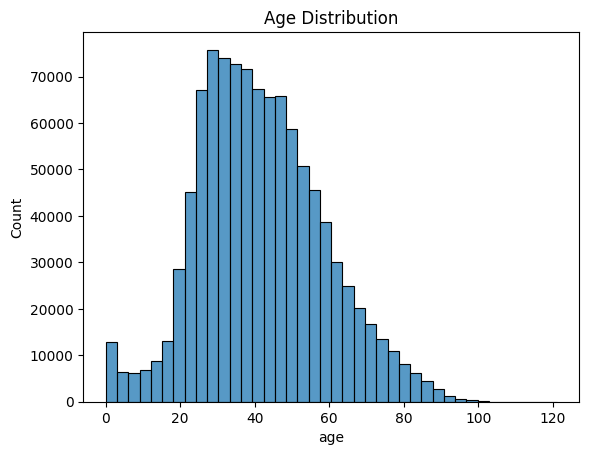

In [28]:
# Age distribution
p1 = sns.histplot(data=df1, x='age', bins=40)
plt.title('Age Distribution')
plt.show(p1)

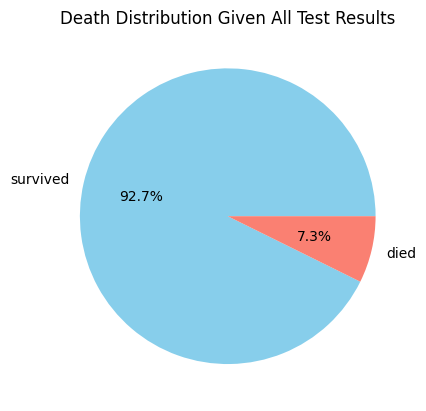

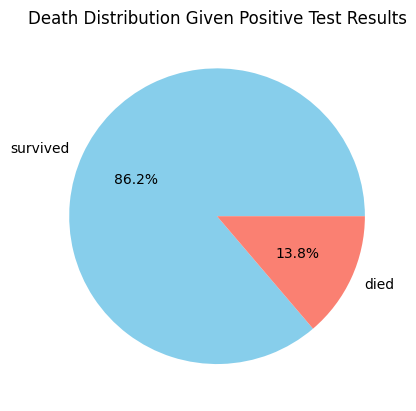

In [30]:
# Death distribution given all test results
p2 = plt.pie(df1.death.value_counts().values, labels=['survived', 'died'], autopct='%1.1f%%', colors=['skyblue','salmon'])
plt.title('Death Distribution Given All Test Results')
plt.show(p2)

# Death Distribution Given Positive Test Results
options = [1,2,3]
positive = df1[df1['clasiffication_final'].isin(options)]
p3 = plt.pie(positive.death.value_counts().values, labels=['survived', 'died'], autopct='%1.1f%%', colors=['skyblue','salmon'])
plt.title('Death Distribution Given Positive Test Results')
plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

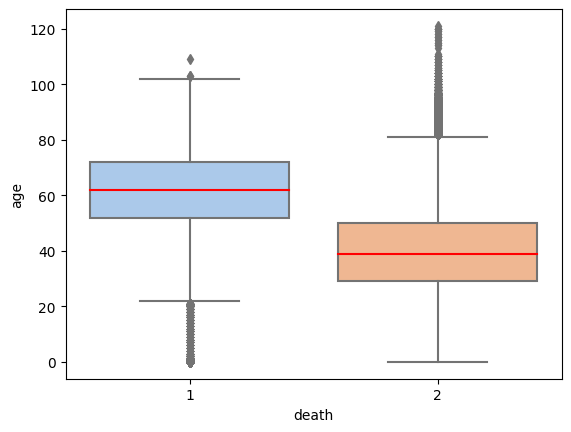

In [31]:
# Age vs Death
p4 = sns.boxplot(sns.boxplot(
    data=df1, x='death', y='age',
    medianprops={"color": "red"},
    palette="pastel"))
p3.set_xticklabels(['yes','no'])
plt.title("Age vs Death")
plt.show(p4)

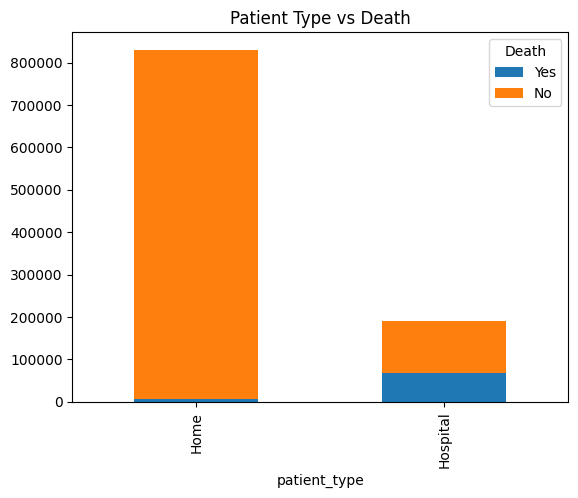

In [32]:
# Patient Type vs Death
df_plot = df1.groupby(['patient_type', 'death']).size().reset_index().pivot(columns='death', index='patient_type', values=0)
p5 = df_plot.plot(kind='bar', stacked=True, legend=False)
p5.set_xticklabels(['Home','Hospital'])
plt.title("Patient Type vs Death")
plt.legend(title='Death', labels=['Yes', 'No'])
plt.show(p5)

# Feature Selection

### Creating Training and Testing Sets

In [15]:
#Preparing the data
#Preparing the categorical features which are not binary
# df2 = pd.get_dummies(df1,columns=["medical_unit","clasiffication_final"],drop_first=True)
df2 = df1

X = df2.drop(columns=['death'], axis=1)
y = df2['death']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)


Train (684724, 18) (684724,)
Test (337253, 18) (337253,)


### Mutual Information Classification Feature Selection

In [17]:
mutual_info = mutual_info_classif(X_train, y_train)

KeyboardInterrupt: 

In [18]:
mutual_info

array([0.09337825, 0.08140644, 0.07474434, 0.19871702, 0.19892151,
       0.0570645 , 0.14172245, 0.14065776, 0.14335055, 0.13662319,
       0.14141219, 0.13392704, 0.13818156, 0.14062956, 0.11594342,
       0.14389393, 0.12679791, 0.07132608])

pneumonia               0.198922
patient_type            0.198717
renal_chronic           0.143894
copd                    0.143351
pregnant                0.141722
inmsupr                 0.141412
diabetes                0.140658
cardiovascular          0.140630
other_disease           0.138182
asthma                  0.136623
hipertension            0.133927
tobacco                 0.126798
obesity                 0.115943
usmer                   0.093378
medical_unit            0.081406
sex                     0.074744
clasiffication_final    0.071326
age                     0.057064
dtype: float64

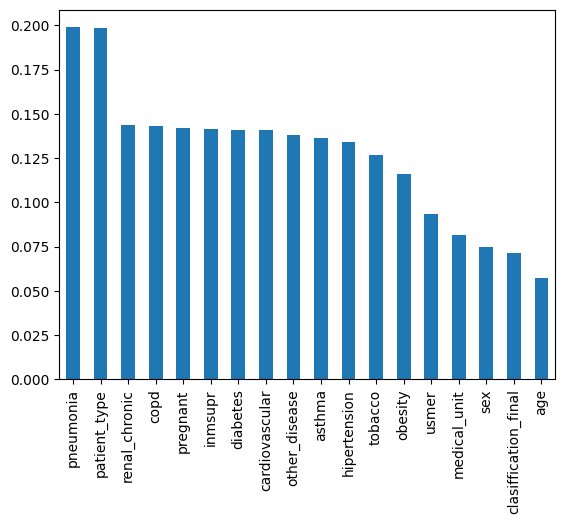

In [19]:
scores = pd.Series(mutual_info, index = X_train.columns)
scores.sort_values(ascending=False, inplace=True)
scores.plot.bar()
scores


### Chi-Squared Feature Selection

In [20]:
chi_scores = chi2(X_train, y_train)

In [21]:
chi_scores

(array([1.36038185e+03, 2.51592167e+04, 7.48222580e+02, 2.36672359e+04,
        9.44149156e+03, 4.76053371e+05, 1.08061770e+00, 1.78977165e+03,
        4.02281887e+01, 3.02431944e+00, 1.08133203e+01, 2.03100585e+03,
        3.00090989e+01, 3.89139508e+01, 1.45553254e+02, 8.48719239e+01,
        6.60207391e-01, 1.79033328e+04]),
 array([8.54330644e-298, 0.00000000e+000, 9.76960928e-165, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 2.98559413e-001, 0.00000000e+000,
        2.25964114e-010, 8.20247274e-002, 1.00772411e-003, 0.00000000e+000,
        4.30023742e-008, 4.42904072e-010, 1.62557615e-033, 3.18331418e-020,
        4.16486736e-001, 0.00000000e+000]))

age                     476053.371041
medical_unit             25159.216708
patient_type             23667.235940
clasiffication_final     17903.332753
pneumonia                 9441.491556
hipertension              2031.005848
diabetes                  1789.771646
usmer                     1360.381848
sex                        748.222580
obesity                    145.553254
renal_chronic               84.871924
copd                        40.228189
cardiovascular              38.913951
other_disease               30.009099
inmsupr                     10.813320
asthma                       3.024319
pregnant                     1.080618
tobacco                      0.660207
dtype: float64

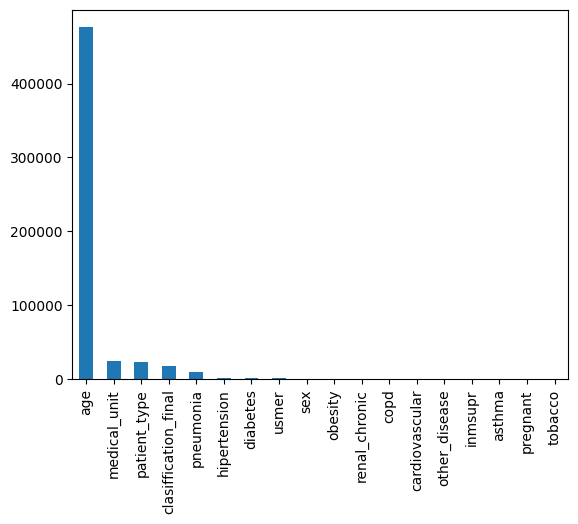

In [22]:
#Higher the chi value the higher the importance
chi_values = pd.Series(chi_scores[0], index = X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()
chi_values

### P-Values

tobacco                  4.164867e-01
pregnant                 2.985594e-01
asthma                   8.202473e-02
inmsupr                  1.007724e-03
other_disease            4.300237e-08
cardiovascular           4.429041e-10
copd                     2.259641e-10
renal_chronic            3.183314e-20
obesity                  1.625576e-33
sex                     9.769609e-165
usmer                   8.543306e-298
hipertension             0.000000e+00
medical_unit             0.000000e+00
diabetes                 0.000000e+00
age                      0.000000e+00
pneumonia                0.000000e+00
patient_type             0.000000e+00
clasiffication_final     0.000000e+00
dtype: float64

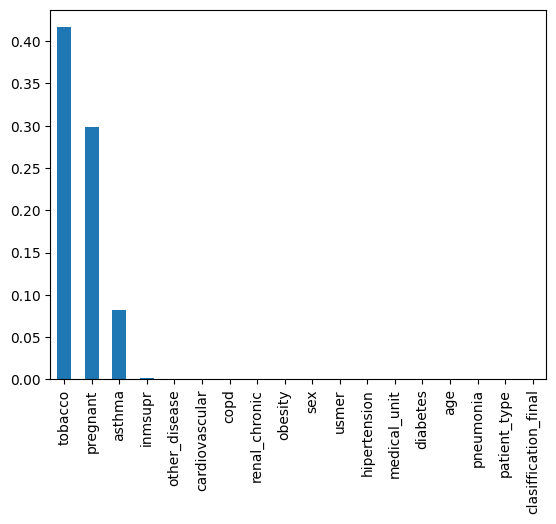

In [23]:
#Lower the p score the higher the importance
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()
p_values

### Random Forest Feature Selection

In [25]:
# Accuracy with 10 trees
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 10 decision-trees : 0.9336


In [24]:
# Accuracy with 100 trees
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9336


age                     0.332921
patient_type            0.201529
pneumonia               0.152854
clasiffication_final    0.073187
medical_unit            0.067923
diabetes                0.027084
hipertension            0.023754
obesity                 0.018391
usmer                   0.018122
sex                     0.014562
tobacco                 0.013554
cardiovascular          0.010554
other_disease           0.010475
renal_chronic           0.010469
copd                    0.009272
inmsupr                 0.008170
asthma                  0.006361
pregnant                0.000819
dtype: float64

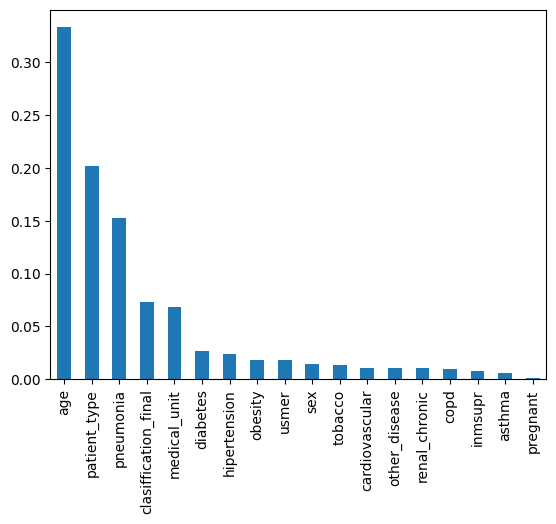

In [26]:
# Ranking feature importance
feature_scores = pd.Series(rfc_100.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores.plot.bar()
feature_scores

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=096acc89-4fdc-4a23-944f-55ca6c303d70' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>